In [1]:
import torch
import numpy as np
import pandas as pd
import os
import math
import warnings
import itertools
import numbers
import torch.utils.data as utils
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
inputpath = './input/set-a/'
inputdict = {
    "ALP" : 0,             # o
    "ALT" : 1,             # o
    "AST" : 2,             # o
    "Albumin" : 3,         # o
    "BUN" : 4,             # o
    "Bilirubin" : 5,       # o
    "Cholesterol" : 6,     # o
    "Creatinine" : 7,      # o
    "DiasABP" : 8,         # o
    "FiO2" : 9,            # o
    "GCS" : 10,            # o
    "Glucose" : 11,        # o
    "HCO3" : 12,           # o
    "HCT" : 13,            # o
    "HR" : 14,             # o
    "K" : 15,              # o
    "Lactate" : 16,        # o
    "MAP" : 17,            # o
    "Mg" : 18,             # o
    "Na" : 19,             # o
    "PaCO2" : 20,          # o
    "PaO2" : 21,           # o
    "Platelets" : 22,      # o
    "RespRate" : 23,       # o
    "SaO2" : 24,           # o
    "SysABP" : 25,         # o
    "Temp" : 26,           # o
    "Tropl" : 27,          # o
    "TroponinI" : 27,      # temp: regarded same as Tropl
    "TropT" : 28,          # o
    "TroponinT" : 28,      # temp: regarded same as TropT
    "Urine" : 29,          # o
    "WBC" : 30,            # o
    "Weight" : 31,         # o
    "pH" : 32,             # o
    "NIDiasABP" : 33,      # unused variable
    "NIMAP" : 34,          # unused variable
    "NISysABP" : 35,       # unused variable
    "MechVent" : 36,       # unused variable
    "RecordID" : 37,       # unused variable
    "Age" : 38,            # unused variable
    "Gender" :39,          # unused variable
    "ICUType" : 40,        # unused variable
    "Height": 41           # unused variable
}

In [3]:
# functions to process the time in the data
def timeparser(time):
    return pd.to_timedelta(time + ':00')

def timedelta_to_day_figure(timedelta):
    return timedelta.days + (timedelta.seconds/86400) #(24*60*60)

In [4]:
# group the data by time
def df_to_inputs(df, inputdict, inputs):
    grouped_data = df.groupby('Time')
            
    for row_index, value in df.iterrows():
        '''
        t = colum ~ time frame
        agg_no = row ~ variable
        '''
        
        agg_no = inputdict[value.Parameter]

        #print('agg_no : {}\t  value : {}'.format(agg_no, value.Value))
        inputs[agg_no].append(value.Value)    
        
    return inputs

In [5]:
inputs = []

# prepare empty list to put data
# len(inputdict)-2: two items has same agg_no
for i in range(len(inputdict)-2):
    t = []
    inputs.append(t)

# read all the files in the input folder
for filename in os.listdir(inputpath):
    df = pd.read_csv(inputpath + filename, header=0,\
                     parse_dates=['Time'], date_parser=timeparser)
    
    inputs = df_to_inputs(df=df, inputdict=inputdict, inputs=inputs)

print(inputs[0][0])

127.0


In [6]:
# save inputs just in case
#np.save('./input/inputs', inputs)
loaded_inputs = np.load('./input/inputs.npy')
print(loaded_inputs[0][0])

127.0


In [7]:
# make input items list
input_columns = list(inputdict.keys())

'''
remove two overlaped items
"TroponinI" : 27, #temp
"TroponinT" : 28, #temp

'''
input_columns.remove("TroponinI")
input_columns.remove("TroponinT")
print(input_columns)
print(len(input_columns))

['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'MAP', 'Mg', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp', 'Tropl', 'TropT', 'Urine', 'WBC', 'Weight', 'pH', 'NIDiasABP', 'NIMAP', 'NISysABP', 'MechVent', 'RecordID', 'Age', 'Gender', 'ICUType', 'Height']
42


In [8]:
# describe the data
# print count, min, max, mean, median, std, var and histogram if hist == True
# return values as a list
def describe(inputs, input_columns, inputdict, hist = False):
    
    desc = [] 
    
    for i in range(len(inputdict)-2):
        input_arr = np.asarray(inputs[i])
        
        des = []
        
        des.append(input_arr.size)
        des.append(np.amin(input_arr))
        des.append(np.amax(input_arr))
        des.append(np.mean(input_arr))
        des.append(np.median(input_arr))
        des.append(np.std(input_arr))
        des.append(np.var(input_arr))
        
        desc.append(des)
        
        # print histgram
        if hist:
            a = np.hstack(input_arr)
            plt.hist(a, bins='auto')
            plt.title("Histogram about {}".format(input_columns[i]))
            plt.show()
        
        print('count: {}, min: {}, max: {}'.format(des[0], des[1], des[2]))
        print('mean: {}, median: {}, std: {}, var: {}'.format(des[3], des[4], des[5], des[6]))
    
    return desc        

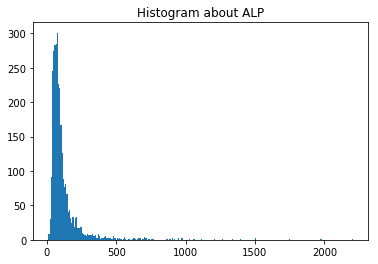

count: 3092, min: 12.0, max: 2205.0
mean: 116.77328589909443, median: 82.0, std: 133.88381709195593, var: 17924.87647911231


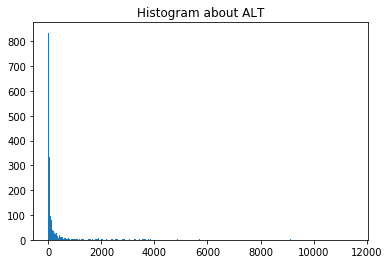

count: 3177, min: 1.0, max: 11470.0
mean: 394.4749763928234, median: 43.0, std: 1199.9801908265079, var: 1439952.4583760223


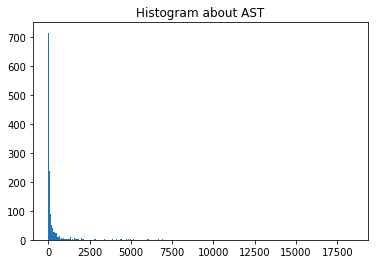

count: 3182, min: 4.0, max: 18430.0
mean: 506.2840980515399, median: 64.0, std: 1516.1916042785547, var: 2298836.9808847774


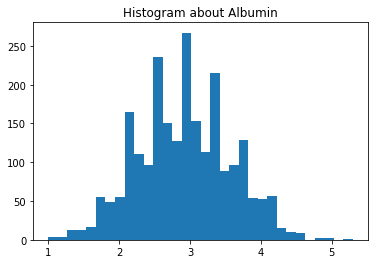

count: 2356, min: 1.0, max: 5.3
mean: 2.9223259762309, median: 2.9, std: 0.6514075310421351, var: 0.4243317714984103


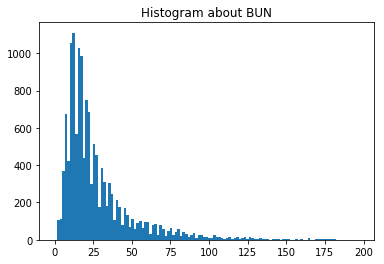

count: 13916, min: 0.0, max: 197.0
mean: 27.416527737855706, median: 20.0, std: 23.393032927627267, var: 547.2339895530536


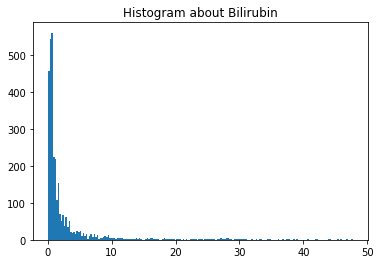

count: 3191, min: 0.1, max: 47.7
mean: 2.9085553118144785, median: 0.9, std: 5.903983019417633, var: 34.85701549357175


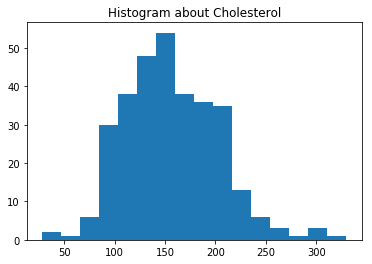

count: 315, min: 28.0, max: 330.0
mean: 156.51746031746032, median: 152.0, std: 45.99491531484598, var: 2115.532234819854


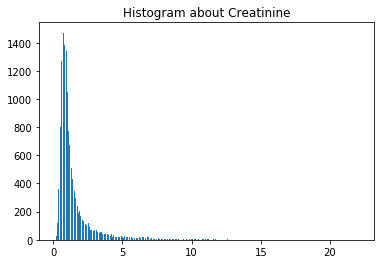

count: 13983, min: 0.1, max: 22.1
mean: 1.5049774726453549, median: 1.0, std: 1.635940329877449, var: 2.6763007629195372


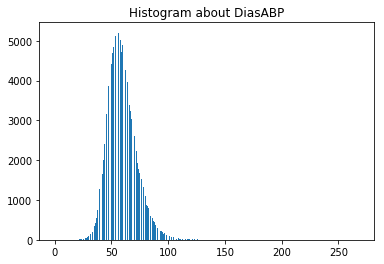

count: 145567, min: 0.0, max: 268.0
mean: 59.29051227269917, median: 58.0, std: 13.318150168032814, var: 177.37312389827247


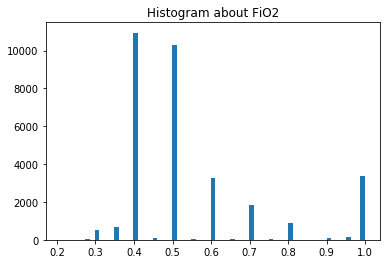

count: 32390, min: 0.21, max: 1.0
mean: 0.5452014510651436, median: 0.5, std: 0.18984649512536758, var: 0.03604169171138622


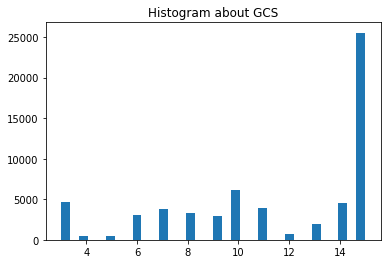

count: 61563, min: 3.0, max: 15.0
mean: 11.398713512986697, median: 13.0, std: 3.973384107597854, var: 15.787781266511196


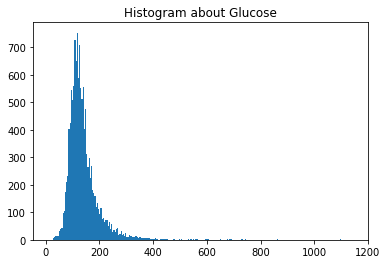

count: 13021, min: 10.0, max: 1143.0
mean: 141.5095614776131, median: 127.0, std: 67.69497269352857, var: 4582.609327977579


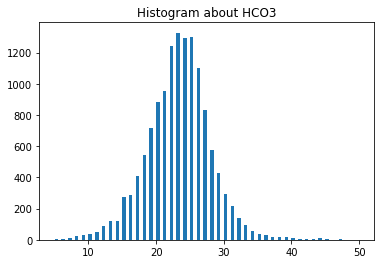

count: 13613, min: 5.0, max: 50.0
mean: 23.11574230514949, median: 23.0, std: 4.710165655553443, var: 22.185660502755194


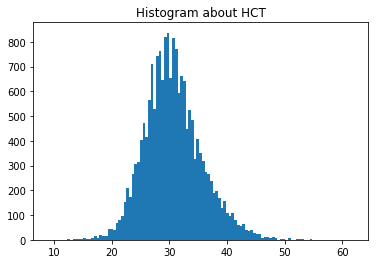

count: 18271, min: 9.0, max: 61.8
mean: 30.679043292649556, median: 30.3, std: 5.013220252647734, var: 25.132377301557415


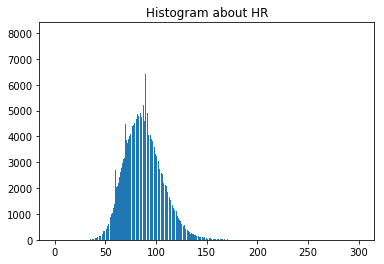

count: 228538, min: 0.0, max: 300.0
mean: 87.51744217591822, median: 86.0, std: 18.4049963443074, var: 338.7438904339688


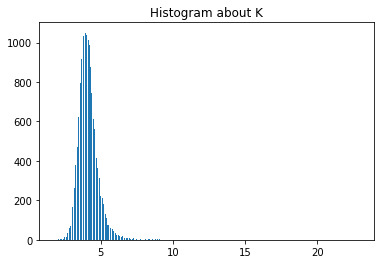

count: 14440, min: 1.8, max: 22.9
mean: 4.136218836565097, median: 4.1, std: 0.7070606291358562, var: 0.49993473327399274


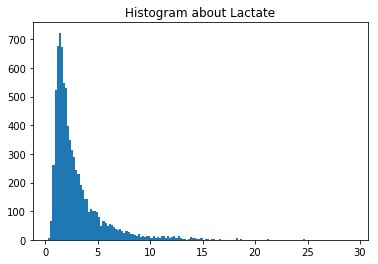

count: 8024, min: 0.3, max: 29.3
mean: 2.924779411764706, median: 2.1, std: 2.579141072175832, var: 6.6519686701843


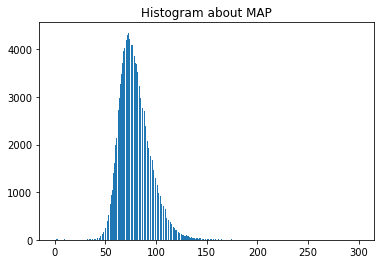

count: 145760, min: 0.0, max: 300.0
mean: 79.74292672886938, median: 77.0, std: 16.926822834796283, var: 286.51733128058083


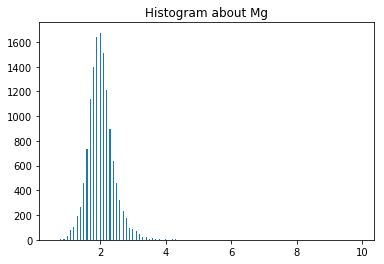

count: 13590, min: 0.6, max: 9.9
mean: 2.0279102281089036, median: 2.0, std: 0.4221239657011912, var: 0.17818864241930044


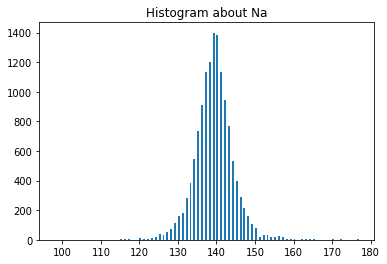

count: 13570, min: 98.0, max: 177.0
mean: 139.07582903463523, median: 139.0, std: 5.19109386912776, var: 26.947455558095825


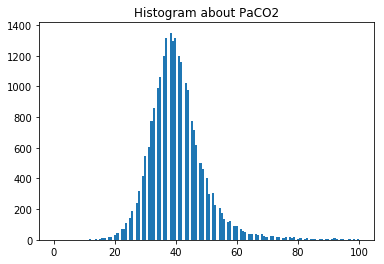

count: 23293, min: 0.3, max: 100.0
mean: 40.47474777830249, median: 39.0, std: 9.126020846980067, var: 83.28425649951478


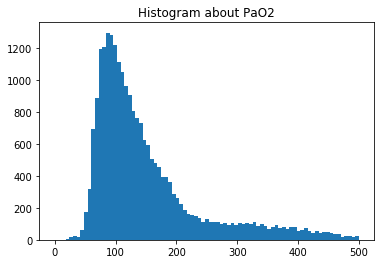

count: 23268, min: 0.0, max: 500.0
mean: 150.41526860924876, median: 121.0, std: 89.29887429104858, var: 7974.288949648496


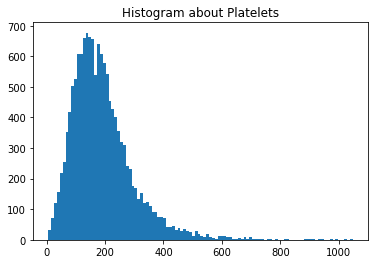

count: 14104, min: 6.0, max: 1047.0
mean: 190.81571894498015, median: 172.0, std: 106.3917362142324, var: 11319.201534678808


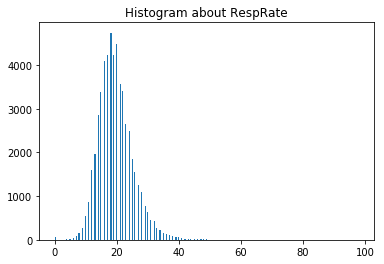

count: 55051, min: 0.0, max: 98.0
mean: 19.723728905923597, median: 19.0, std: 5.552301672088858, var: 30.82805385788073


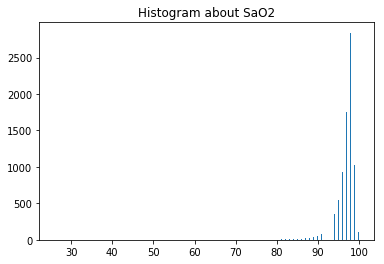

count: 8185, min: 26.0, max: 100.0
mean: 96.63706780696396, median: 97.0, std: 3.4000868440410503, var: 11.56059054702103


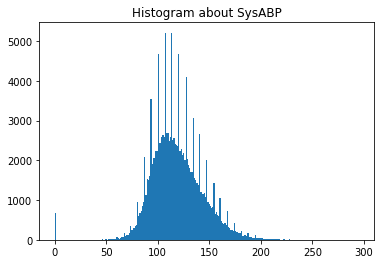

count: 145650, min: 0.0, max: 295.0
mean: 118.6978990731205, median: 116.0, std: 25.01615547443329, var: 625.8080347210188


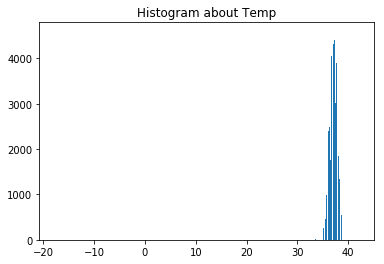

count: 86405, min: -17.8, max: 42.1
mean: 37.00765117759389, median: 37.1, std: 1.7751633850901565, var: 3.151205043764743


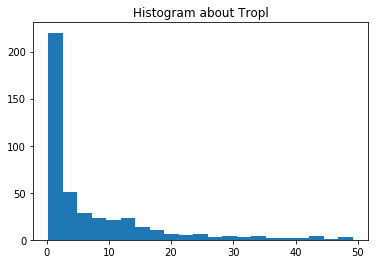

count: 435, min: 0.3, max: 49.2
mean: 7.1512643678160925, median: 2.6, std: 9.756165961249481, var: 95.18277426344301


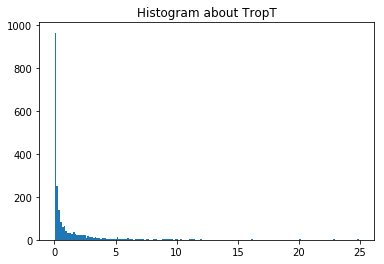

count: 2126, min: 0.01, max: 24.91
mean: 1.1984510818438383, median: 0.2, std: 2.7137681474380155, var: 7.364537558049158


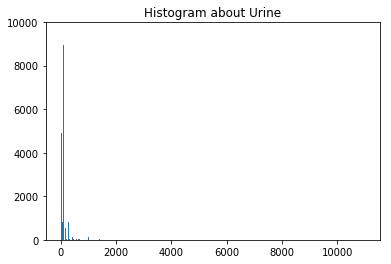

count: 136918, min: 0.0, max: 11000.0
mean: 120.7987284359982, median: 70.0, std: 184.725839486602, var: 34123.635774029855


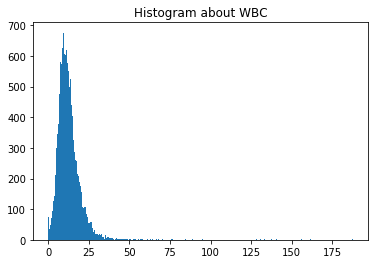

count: 12910, min: 0.1, max: 187.5
mean: 12.670084430673894, median: 11.4, std: 7.6412549541321315, var: 58.38877727404884


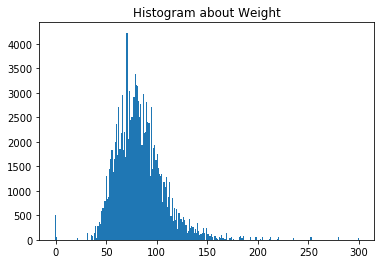

count: 129165, min: -1.0, max: 300.0
mean: 83.38661525955173, median: 80.6, std: 25.047736295633516, var: 627.3890935355965


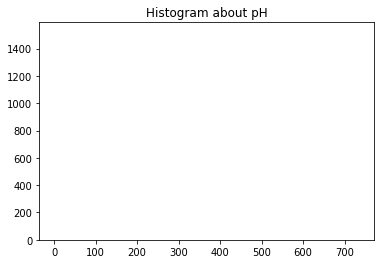

count: 24355, min: 1.0, max: 735.0
mean: 7.489199753644017, median: 7.38, std: 8.24393650029319, var: 67.96248902086631


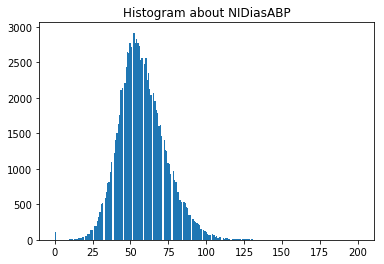

count: 98210, min: 0.0, max: 201.0
mean: 57.95386416861827, median: 56.0, std: 15.54770421605256, var: 241.73110638985855


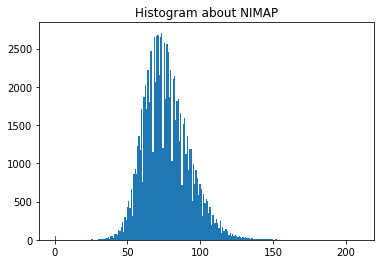

count: 96871, min: 0.0, max: 209.0
mean: 76.78045028956033, median: 75.0, std: 15.636321918012724, var: 244.4945631237251


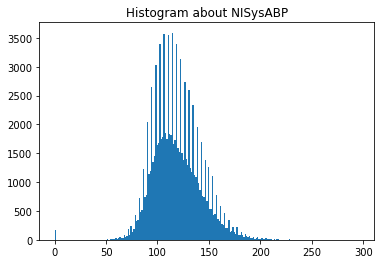

count: 98331, min: 0.0, max: 296.0
mean: 118.59402426498256, median: 116.0, std: 23.260108542419857, var: 541.0326494051532


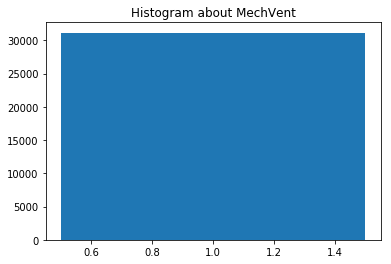

count: 31144, min: 1.0, max: 1.0
mean: 1.0, median: 1.0, std: 0.0, var: 0.0


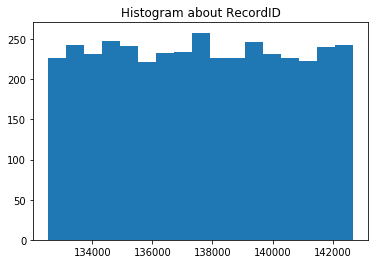

count: 4000, min: 132539.0, max: 142673.0
mean: 137605.122, median: 137592.5, std: 2923.2434123958956, var: 8545352.048116


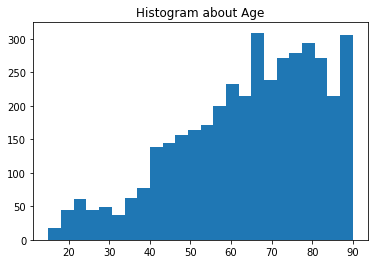

count: 4000, min: 15.0, max: 90.0
mean: 64.2475, median: 67.0, std: 17.558751201324085, var: 308.30974375


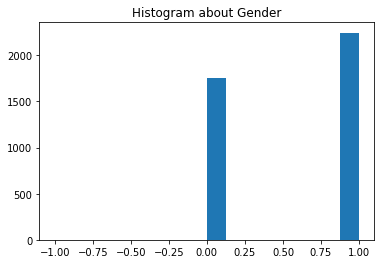

count: 4000, min: -1.0, max: 1.0
mean: 0.56075, median: 1.0, std: 0.4978046177969827, var: 0.2478094375


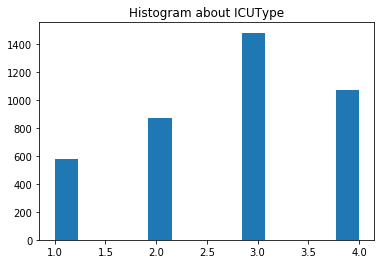

count: 4000, min: 1.0, max: 4.0
mean: 2.76, median: 3.0, std: 1.002447006080621, var: 1.0049000000000003


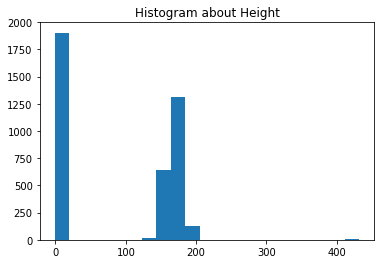

count: 4000, min: -1.0, max: 431.8
mean: 88.919475, median: 152.4, std: 86.52038637352688, var: 7485.777258224375


(42, 7)

In [9]:
desc = describe(loaded_inputs, input_columns, inputdict, hist=True)
desc = np.asarray(desc)
desc.shape

In [10]:
# save desc
# 0: count, 1: min, 2: max, 3: mean, 4: median, 5: std, 6: var
np.save('./input/desc', desc)
loaded_desc = np.load('./input/desc.npy')

In [11]:
def normalization(desc, inputs):
    # for each catagory
    for i in range(desc.shape[0]):
        # for each value
        for j in range(len(inputs[i])):
            inputs[i][j] = (inputs[i][j] - desc[i][3])/desc[i][5]
    return inputs

In [22]:
'''
dataframe to dataset
'''

def df_to_x_m_d(df, inputdict, size, id_posistion, split):
    grouped_data = df.groupby('Time')
    
    #generate input vectors
    x = np.zeros((len(inputdict)-2, grouped_data.ngroups))
    masking = np.zeros((len(inputdict)-2, grouped_data.ngroups))
    delta = np.zeros((split, size))
    timetable = np.zeros(grouped_data.ngroups)
    id = 0
    
    all_x = np.zeros((split,1))
    
    s_dataset = np.zeros((3, split, size))
   
    if grouped_data.ngroups > size:
        
        # fill the x and masking vectors
        pre_time = pd.to_timedelta(0)
        t = 0
        for row_index, value in df.iterrows():
            '''
            t = colum, time frame
            agg_no = row, variable
            '''
            #print(value)
            agg_no = inputdict[value.Parameter]

            # same timeline check.        
            if pre_time != value.Time:
                pre_time = value.Time
                t += 1
                timetable[t] = timedelta_to_day_figure(value.Time)

            #print('agg_no : {}\t t : {}\t value : {}'.format(agg_no, t, value.Value))
            x[agg_no, t] = value.Value    
            masking[agg_no, t] = 1
        
        '''
        # generate random index array 
        ran_index = np.random.choice(grouped_data.ngroups, size=size, replace=False)
        ran_index.sort()
        ran_index[0] = 0
        ran_index[size-1] = grouped_data.ngroups-1
        '''
        
        # generate index that has most parameters and first/last one.
        ran_index = grouped_data.count()
        ran_index = ran_index.reset_index()
        ran_index = ran_index.sort_values('Value', ascending=False)
        ran_index = ran_index[:size]
        ran_index = ran_index.sort_index()
        ran_index = np.asarray(ran_index.index.values)
        ran_index[0] = 0
        ran_index[size-1] = grouped_data.ngroups-1
        
        #print(ran_index)
        
        # take id for outcome comparing
        id = x[id_posistion, 0]
        
        # remove unnesserly parts(rows)
        x = x[:split, :]
        masking = masking[:split, :]
        
        # coulme(time) sampling
        x_sample = np.zeros((split, size))
        m_sample = np.zeros((split, size))
        time_sample = np.zeros(size)

        t_x_sample = x_sample.T
        t_marsking = m_sample.T
        #t_time = t_sample.T
        
        t_x = x.T
        t_m = masking.T
        #t_t = t.T

        it = np.nditer(ran_index, flags=['f_index'])
        while not it.finished:
            #print('it.index = {}, it[0] = {}, ran_index = {}'.format(it.index, it[0], ran_index[it.index]))
            t_x_sample[it.index] = t_x[it[0]]
            t_marsking[it.index] = t_m[it[0]]
            time_sample[it.index] = timetable[it[0]]
            it.iternext()
        
        x = x_sample
        masking = m_sample
        timetable = time_sample
        '''
        # normalize the X
        nor_x = x/max_input[:, np.newaxis]
        '''
        # fill the delta vectors
        for index, value in np.ndenumerate(masking):
            '''
            index[0] = row, agg
            index[1] = col, time
            '''
            if index[1] == 0:
                delta[index[0], index[1]] = 0
            elif masking[index[0], index[1]-1] == 0:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1] + delta[index[0], index[1]-1]
            else:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1]
    
    else:
                
        # fill the x and masking vectors
        pre_time = pd.to_timedelta(0)
        t = 0
        for row_index, value in df.iterrows():
            '''
            t = colum, time frame
            agg_no = row, variable
            '''
            #print(value)
            agg_no = inputdict[value.Parameter]

            # same timeline check.        
            if pre_time != value.Time:
                pre_time = value.Time
                t += 1
                timetable[t] = timedelta_to_day_figure(value.Time)

            #print('agg_no : {}\t t : {}\t value : {}'.format(agg_no, t, value.Value))
            x[agg_no, t] = value.Value    
            masking[agg_no, t] = 1
        
        # take id for outcome comparing
        id = x[id_posistion, 0]
        
        # remove unnesserly parts(rows)
        x = x[:split, :]
        masking = masking[:split, :]
        
        x = np.pad(x, ((0,0), (size-grouped_data.ngroups, 0)), 'constant')
        masking = np.pad(masking, ((0,0), (size-grouped_data.ngroups, 0)), 'constant')
        timetable = np.pad(timetable, (size-grouped_data.ngroups, 0), 'constant')
        '''
        # normalize the X
        nor_x = x/max_input[:, np.newaxis]
        '''
        # fill the delta vectors
        for index, value in np.ndenumerate(masking):
            '''
            index[0] = row, agg
            index[1] = col, time
            '''
            if index[1] == 0:
                delta[index[0], index[1]] = 0
            elif masking[index[0], index[1]-1] == 0:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1] + delta[index[0], index[1]-1]
            else:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1]
    

    all_x = np.concatenate((all_x, x), axis=1)
    all_x = all_x[:,1:]
    
    s_dataset[0] = x
    s_dataset[1] = masking
    s_dataset[2] = delta
    
    return s_dataset, all_x, id

In [23]:
# def df_to_x_m_d(df, inputdict, mean, std, size, id_posistion, split):
size = 49 # steps ~ from the paper
id_posistion = 37
input_length = 33 # input variables ~ from the paper
dataset = np.zeros((1,3, input_length, size))

all_x_add = np.zeros((input_length,1))

for filename in os.listdir(inputpath):
    df = pd.read_csv(inputpath + filename,\
                     header=0,\
                     parse_dates=['Time'],\
                     date_parser=timeparser)
    s_dataset, all_x, id = df_to_x_m_d(df=df, inputdict=inputdict, size=size, id_posistion=id_posistion, split=input_length)
    
    dataset = np.concatenate((dataset, s_dataset[np.newaxis, :,:,:]))
    all_x_add = np.concatenate((all_x_add, all_x), axis=1)
    

dataset = dataset[1:, :,:,:]    
# (total datasets, kind of data(x, masking, and delta), input length, num of varience)
# (4000, 3, 33, 49)
print(dataset.shape)
print(dataset[0].shape)
print(dataset[0][0][0])

print(all_x_add.shape)
all_x_add = all_x_add[:, 1:]
print(all_x_add.shape)

(4000, 3, 33, 49)
(3, 33, 49)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(33, 196001)
(33, 196000)


In [24]:
def get_mean(x):
    x_mean = []
    for i in range(x.shape[0]):
        mean = np.mean(x[i])
        x_mean.append(mean)
    return x_mean

In [25]:
def get_median(x):
    x_median = []
    for i in range(x.shape[0]):
        median = np.median(x[i])
        x_median.append(median)
    return x_median

In [26]:
def get_std(x):
    x_std = []
    for i in range(x.shape[0]):
        std = np.std(x[i])
        x_std.append(std)
    return x_std

In [27]:
def get_var(x):
    x_var = []
    for i in range(x.shape[0]):
        var = np.var(x[i])
        x_var.append(var)
    return x_var

In [28]:
x_mean = get_mean(all_x_add)
print(x_mean)
print(len(x_mean))

[1.7756938775510205, 5.97834693877551, 7.722663265306123, 0.03346275510204082, 1.8662673469387756, 0.046094897959183666, 0.23484693877551022, 0.10232295918367348, 31.794086734693877, 0.06208226020408165, 3.4170867346938776, 9.052362244897958, 1.5527785714285713, 2.027482653061224, 76.77518826530613, 0.2751964285714285, 0.008870969387755102, 42.63729591836735, 0.12509591836734693, 9.225698979591836, 0.45981785714285717, 1.61775, 11.772515306122449, 4.651505102040816, 0.6695663265306122, 63.784760204081635, 13.67655, 0.011510204081632652, 0.010320801020408164, 73.5413331632653, 0.7319836734693879, 44.211676326530615, 0.09725316326530611]
33


In [29]:
x_std = get_std(all_x_add)
print(x_std)
print(len(x_std))

[21.872321364351627, 151.56546524731397, 194.23864814005054, 0.3184498312786317, 9.24687680676811, 0.832940240386789, 6.321232440624928, 0.5710527887455769, 31.22682492065324, 0.18327589644563932, 5.660517831888718, 38.54457091434304, 5.91803908970665, 7.806742971702712, 32.54644570613374, 1.0454207907743003, 0.19265839040103455, 41.90735916126923, 0.49772973465410975, 34.635464657074074, 4.443667431563052, 17.395141306121918, 53.73218196076791, 8.771020539600647, 8.027098385182324, 62.16068745346528, 17.908362061622306, 0.48757162205215626, 0.27738360252356337, 145.18258095214713, 3.481610062351047, 45.53350501579691, 2.993331468514329]
33


In [30]:
# dataset shape : (4000, 3, 33, 49)
def dataset_normalize(dataset, mean, std):
    for i in range(dataset.shape[0]):        
        dataset[i][0] = (dataset[i][0] - mean[:, None])
        dataset[i][0] = dataset[i][0]/std[:, None]
        
    return dataset

In [31]:
x_mean = np.asarray(x_mean)
x_std = np.asarray(x_std)

In [32]:
dataset = dataset_normalize(dataset=dataset, mean=x_mean, std=x_std)
print(dataset[0][0][0])

[-0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452 -0.08118452
 -0.08118452]


In [33]:
def normalize_chk(dataset):
    all_x_add = np.zeros((dataset[0][0].shape[0],1))
    for i in range(dataset.shape[0]):
        all_x_add = np.concatenate((all_x_add, dataset[i][0]), axis=1)
    
    mean = get_mean(all_x_add)
    median = get_median(all_x_add)
    std = get_std(all_x_add)
    var = get_var(all_x_add)
    
    print('mean')
    print(mean)
    print('median')
    print(median)
    print('std')
    print(std)
    print('var')
    print(var)
    
    return mean, median, std, var

In [34]:
nor_mean, nor_median, nor_std, nor_var = normalize_chk(dataset)

mean
[-1.725594982789923e-17, 6.0903352333761985e-18, -1.2180670466752397e-17, 2.5303892814860633e-17, -3.077794412581186e-17, 1.0948102621902453e-17, -3.4076875710557304e-18, -2.4941372860493004e-17, 2.6681468641457633e-17, -6.307847205996778e-17, 1.479081413819934e-17, 6.380351196870304e-17, 6.606926168350073e-17, -1.9974849485656462e-17, -1.2282176053975334e-16, 8.704104104366817e-17, -5.437799315514463e-18, -7.366405472750259e-17, -8.821016789650378e-17, 2.981726624673764e-17, -2.2621245152540165e-17, -5.075279361146832e-19, -5.263789737418e-17, 1.537084606518755e-16, 3.944217103519824e-17, -1.3108721549933533e-16, 5.017276168448011e-17, 1.3775758265969974e-18, -7.97543899608788e-18, -1.2724450398303843e-17, 2.6681468641457633e-17, -9.817040364275444e-17, -2.6101436714469423e-18]
median
[-0.08118451845925767, -0.03944399160468686, -0.03975863371813577, -0.10508014706015704, -0.20182677740151028, -0.05533998205895151, -0.03715208086103742, -0.17918301284973112, 0.3588553525304008, -

In [35]:
np.save('./input/x_mean_aft_nor', nor_mean)
np.save('./input/x_median_aft_nor', nor_median)
np.save('./input/dataset', dataset)

t_dataset = np.load('./input/dataset.npy')

print(t_dataset.shape)

(4000, 3, 33, 49)


In [26]:
'''
Y values
'''
def df_to_y3(df):
    '''
    RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
    '''
    output = np.zeros((4000,3))
    
    for row_index, value in df.iterrows():
        los = value[3] # Length_of_stay
        sur = value[4] # Survival
        ihd = value[5] # In-hospital_death

        output[row_index][0] = ihd
        output[row_index][1] = ihd

        # length-of-stay less than 3 yes/no 1/0
        if los < 3:
            output[row_index][2] = 0
        else:
            output[row_index][2] = 1

    return output

In [27]:
# only check In-hospital_death
def df_to_y1(df):
    output = df.values
    output = output[:,5:]

    return output

In [28]:
A_outcomes = pd.read_csv('./input/Outcomes-a.txt')
y1_outcomes = df_to_y1(A_outcomes)
print(y1_outcomes.shape)
np.save('./input/y1_out', y1_outcomes)

(4000, 1)


In [29]:
def df_to_y2(df):
    '''
    RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
    '''
    output = np.zeros((4000,2))
    
    for row_index, value in df.iterrows():
        ihd = value[5] # In-hospital_death

        output[row_index][0] = ihd
        output[row_index][1] = ihd
        
    return output

In [30]:
A_outcomes = pd.read_csv('./input/Outcomes-a.txt')
y2_outcomes = df_to_y2(A_outcomes)
print(y2_outcomes.shape)
np.save('./input/y2_out', y2_outcomes)

(4000, 2)


In [4]:
# define model
class GRUD(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, x_mean=0,\
                 bias=True, batch_first=False, bidirectional=False, dropout_type='mloss', dropout=0):
        super(GRUD, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.zeros = torch.autograd.Variable(torch.zeros(input_size))
        self.x_mean = torch.autograd.Variable(torch.tensor(x_mean))
        self.bias = bias
        self.batch_first = batch_first
        self.dropout_type = dropout_type
        self.dropout = dropout
        self.bidirectional = bidirectional
        num_directions = 2 if bidirectional else 1
        
        if not isinstance(dropout, numbers.Number) or not 0 <= dropout <= 1 or \
                isinstance(dropout, bool):
            raise ValueError("dropout should be a number in range [0, 1] "
                             "representing the probability of an element being "
                             "zeroed")
        if dropout > 0 and num_layers == 1:
            warnings.warn("dropout option adds dropout after all but last "
                          "recurrent layer, so non-zero dropout expects "
                          "num_layers greater than 1, but got dropout={} and "
                          "num_layers={}".format(dropout, num_layers))
        
        ################################
        gate_size = 1 # not used
        ################################
        
        self._all_weights = []

        '''
        w_ih = Parameter(torch.Tensor(gate_size, layer_input_size))
        w_hh = Parameter(torch.Tensor(gate_size, hidden_size))
        b_ih = Parameter(torch.Tensor(gate_size))
        b_hh = Parameter(torch.Tensor(gate_size))
        layer_params = (w_ih, w_hh, b_ih, b_hh)
        '''
        # decay rates gamma
        w_dg_x = torch.nn.Parameter(torch.Tensor(input_size))
        w_dg_h = torch.nn.Parameter(torch.Tensor(hidden_size))

        # z
        w_xz = torch.nn.Parameter(torch.Tensor(input_size))
        w_hz = torch.nn.Parameter(torch.Tensor(hidden_size))
        w_mz = torch.nn.Parameter(torch.Tensor(input_size))

        # r
        w_xr = torch.nn.Parameter(torch.Tensor(input_size))
        w_hr = torch.nn.Parameter(torch.Tensor(hidden_size))
        w_mr = torch.nn.Parameter(torch.Tensor(input_size))

        # h_tilde
        w_xh = torch.nn.Parameter(torch.Tensor(input_size))
        w_hh = torch.nn.Parameter(torch.Tensor(hidden_size))
        w_mh = torch.nn.Parameter(torch.Tensor(input_size))

        # y (output)
        w_hy = torch.nn.Parameter(torch.Tensor(output_size, hidden_size))

        # bias
        b_dg_x = torch.nn.Parameter(torch.Tensor(hidden_size))
        b_dg_h = torch.nn.Parameter(torch.Tensor(hidden_size))
        b_z = torch.nn.Parameter(torch.Tensor(hidden_size))
        b_r = torch.nn.Parameter(torch.Tensor(hidden_size))
        b_h = torch.nn.Parameter(torch.Tensor(hidden_size))
        b_y = torch.nn.Parameter(torch.Tensor(output_size))

        layer_params = (w_dg_x, w_dg_h,\
                        w_xz, w_hz, w_mz,\
                        w_xr, w_hr, w_mr,\
                        w_xh, w_hh, w_mh,\
                        w_hy,\
                        b_dg_x, b_dg_h, b_z, b_r, b_h, b_y)

        param_names = ['weight_dg_x', 'weight_dg_h',\
                       'weight_xz', 'weight_hz','weight_mz',\
                       'weight_xr', 'weight_hr','weight_mr',\
                       'weight_xh', 'weight_hh','weight_mh',\
                       'weight_hy']
        if bias:
            param_names += ['bias_dg_x', 'bias_dg_h',\
                            'bias_z',\
                            'bias_r',\
                            'bias_h',\
                            'bias_y']
        
        for name, param in zip(param_names, layer_params):
            setattr(self, name, param)
        self._all_weights.append(param_names)

        self.flatten_parameters()
        self.reset_parameters()
        
    def flatten_parameters(self):
        """
        Resets parameter data pointer so that they can use faster code paths.
        Right now, this works only if the module is on the GPU and cuDNN is enabled.
        Otherwise, it's a no-op.
        """
        any_param = next(self.parameters()).data
        if not any_param.is_cuda or not torch.backends.cudnn.is_acceptable(any_param):
            return

        # If any parameters alias, we fall back to the slower, copying code path. This is
        # a sufficient check, because overlapping parameter buffers that don't completely
        # alias would break the assumptions of the uniqueness check in
        # Module.named_parameters().
        all_weights = self._flat_weights
        unique_data_ptrs = set(p.data_ptr() for p in all_weights)
        if len(unique_data_ptrs) != len(all_weights):
            return

        with torch.cuda.device_of(any_param):
            import torch.backends.cudnn.rnn as rnn

            # NB: This is a temporary hack while we still don't have Tensor
            # bindings for ATen functions
            with torch.no_grad():
                # NB: this is an INPLACE function on all_weights, that's why the
                # no_grad() is necessary.
                torch._cudnn_rnn_flatten_weight(
                    all_weights, (4 if self.bias else 2),
                    self.input_size, rnn.get_cudnn_mode(self.mode), self.hidden_size, self.num_layers,
                    self.batch_first, bool(self.bidirectional))

    def _apply(self, fn):
        ret = super(GRUD, self)._apply(fn)
        self.flatten_parameters()
        return ret

    def reset_parameters(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            torch.nn.init.uniform_(weight, -stdv, stdv)

    def check_forward_args(self, input, hidden, batch_sizes):
        is_input_packed = batch_sizes is not None
        expected_input_dim = 2 if is_input_packed else 3
        if input.dim() != expected_input_dim:
            raise RuntimeError(
                'input must have {} dimensions, got {}'.format(
                    expected_input_dim, input.dim()))
        if self.input_size != input.size(-1):
            raise RuntimeError(
                'input.size(-1) must be equal to input_size. Expected {}, got {}'.format(
                    self.input_size, input.size(-1)))

        if is_input_packed:
            mini_batch = int(batch_sizes[0])
        else:
            mini_batch = input.size(0) if self.batch_first else input.size(1)

        num_directions = 2 if self.bidirectional else 1
        expected_hidden_size = (self.num_layers * num_directions,
                                mini_batch, self.hidden_size)
        
        def check_hidden_size(hx, expected_hidden_size, msg='Expected hidden size {}, got {}'):
            if tuple(hx.size()) != expected_hidden_size:
                raise RuntimeError(msg.format(expected_hidden_size, tuple(hx.size())))

        if self.mode == 'LSTM':
            check_hidden_size(hidden[0], expected_hidden_size,
                              'Expected hidden[0] size {}, got {}')
            check_hidden_size(hidden[1], expected_hidden_size,
                              'Expected hidden[1] size {}, got {}')
        else:
            check_hidden_size(hidden, expected_hidden_size)
    
    def extra_repr(self):
        s = '{input_size}, {hidden_size}'
        if self.num_layers != 1:
            s += ', num_layers={num_layers}'
        if self.bias is not True:
            s += ', bias={bias}'
        if self.batch_first is not False:
            s += ', batch_first={batch_first}'
        if self.dropout != 0:
            s += ', dropout={dropout}'
        if self.bidirectional is not False:
            s += ', bidirectional={bidirectional}'
        return s.format(**self.__dict__)
    
    
    def __setstate__(self, d):
        super(GRUD, self).__setstate__(d)
        if 'all_weights' in d:
            self._all_weights = d['all_weights']
        if isinstance(self._all_weights[0][0], str):
            return
        num_layers = self.num_layers
        num_directions = 2 if self.bidirectional else 1
        self._all_weights = []

        weights = ['weight_dg_x', 'weight_dg_h',\
                   'weight_xz', 'weight_hz','weight_mz',\
                   'weight_xr', 'weight_hr','weight_mr',\
                   'weight_xh', 'weight_hh','weight_mh',\
                   'weight_hy',\
                   'bias_dg_x', 'bias_dg_h',\
                   'bias_z', 'bias_r', 'bias_h','bias_y']

        if self.bias:
            self._all_weights += [weights]
        else:
            self._all_weights += [weights[:2]]

    @property
    def _flat_weights(self):
        return list(self._parameters.values())

    @property
    def all_weights(self):
        return [[getattr(self, weight) for weight in weights] for weights in self._all_weights]
    
    def forward(self, input):
        # input.size = (3, 33,49) : num_input or num_hidden, num_layer or step
        X = torch.squeeze(input[0]) # .size = (33,49)
        Mask = torch.squeeze(input[1]) # .size = (33,49)
        Delta = torch.squeeze(input[2]) # .size = (33,49)
        Hidden_State = torch.autograd.Variable(torch.zeros(input_size))
        
        step_size = X.size(1) # 49
        #print('step size : ', step_size)
        
        output = None
        h = Hidden_State

        # decay rates gamma
        w_dg_x = getattr(self, 'weight_dg_x')
        w_dg_h = getattr(self, 'weight_dg_h')

        #z
        w_xz = getattr(self, 'weight_xz')
        w_hz = getattr(self, 'weight_hz')
        w_mz = getattr(self, 'weight_mz')

        # r
        w_xr = getattr(self, 'weight_xr')
        w_hr = getattr(self, 'weight_hr')
        w_mr = getattr(self, 'weight_mr')

        # h_tilde
        w_xh = getattr(self, 'weight_xh')
        w_hh = getattr(self, 'weight_hh')
        w_mh = getattr(self, 'weight_mh')

        # bias
        b_dg_x = getattr(self, 'bias_dg_x')
        b_dg_h = getattr(self, 'bias_dg_h')
        b_z = getattr(self, 'bias_z')
        b_r = getattr(self, 'bias_r')
        b_h = getattr(self, 'bias_h')
        
        for layer in range(num_layers):
            
            x = torch.squeeze(X[:,layer:layer+1])
            m = torch.squeeze(Mask[:,layer:layer+1])
            d = torch.squeeze(Delta[:,layer:layer+1])


            #(4)
            gamma_x = torch.exp(-torch.max(self.zeros, (w_dg_x * x + b_dg_x)))
            gamma_h = torch.exp(-torch.max(self.zeros, (w_dg_h * h + b_dg_h)))

            #(5)
            x = m * x + (1 - m) * (gamma_x * x + (1 - gamma_x) * self.x_mean)

            #(6)
            if self.dropout == 0:
                h = gamma_h * h

                z = torch.sigmoid((w_xz*x + w_hz*h + w_mz*m + b_z))
                r = torch.sigmoid((w_xr*x + w_hr*h + w_mr*m + b_r))
                h_tilde = torch.tanh((w_xh*x + w_hh*(r * h) + w_mh*m + b_h))

                h = (1 - z) * h + z * h_tilde

            elif self.dropout_type == 'Moon':
                '''
                RNNDROP: a novel dropout for rnn in asr(2015)
                '''
                h = gamma_h * h

                z = torch.sigmoid((w_xz*x + w_hz*h + w_mz*m + b_z))
                r = torch.sigmoid((w_xr*x + w_hr*h + w_mr*m + b_r))

                h_tilde = torch.tanh((w_xh*x + w_hh*(r * h) + w_mh*m + b_h))

                h = (1 - z) * h + z * h_tilde
                dropout = torch.nn.Dropout(p=self.dropout)
                h = dropout(h)

            elif self.dropout_type == 'Gal':
                '''
                A Theoretically grounded application of dropout in recurrent neural networks(2015)
                '''
                dropout = torch.nn.Dropout(p=self.dropout)
                h = dropout(h)

                h = gamma_h * h

                z = torch.sigmoid((w_xz*x + w_hz*h + w_mz*m + b_z))
                r = torch.sigmoid((w_xr*x + w_hr*h + w_mr*m + b_r))
                h_tilde = torch.tanh((w_xh*x + w_hh*(r * h) + w_mh*m + b_h))

                h = (1 - z) * h + z * h_tilde

            elif self.dropout_type == 'mloss':
                '''
                recurrent dropout without memory loss arXiv 1603.05118
                g = h_tilde, p = the probability to not drop a neuron
                '''

                h = gamma_h * h

                z = torch.sigmoid((w_xz*x + w_hz*h + w_mz*m + b_z))
                r = torch.sigmoid((w_xr*x + w_hr*h + w_mr*m + b_r))
                h_tilde = torch.tanh((w_xh*x + w_hh*(r * h) + w_mh*m + b_h))

                dropout = torch.nn.Dropout(p=self.dropout)
                h_tilde = dropout(h_tilde)

                h = (1 - z)* h + z*h_tilde

            else:
                h = gamma_h * h

                z = torch.sigmoid((w_xz*x + w_hz*h + w_mz*m + b_z))
                r = torch.sigmoid((w_xr*x + w_hr*h + w_mr*m + b_r))
                h_tilde = torch.tanh((w_xh*x + w_hh*(r * h) + w_mh*m + b_h))

                h = (1 - z) * h + z * h_tilde

            
        w_hy = getattr(self, 'weight_hy')
        b_y = getattr(self, 'bias_y')

        output = torch.matmul(w_hy, h) + b_y
        output = torch.sigmoid(output)
        
        return output

In [5]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [6]:
def data_dataloader(dataset, outcomes,\
                    train_proportion = 0.8, dev_proportion = 0.2, test_proportion = 0.2):
    
    train_index = int(np.floor(dataset.shape[0] * train_proportion))
    dev_index = int(np.floor(dataset.shape[0] * (train_proportion - dev_proportion)))
    
    # split dataset to tarin/dev/test set
    train_data, train_label = dataset[:train_index, :,:,:], outcomes[:train_index, :]
    dev_data, dev_label = dataset[dev_index:train_index, :,:,:], outcomes[dev_index:train_index, :]
    test_data, test_label = dataset[train_index:, :,:,:], outcomes[train_index:, :]   
    
    # ndarray to tensor
    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    dev_data, dev_label = torch.Tensor(dev_data), torch.Tensor(dev_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)
    
    # tensor to dataset
    train_dataset = utils.TensorDataset(train_data, train_label)
    dev_dataset = utils.TensorDataset(dev_data, dev_label)
    test_dataset = utils.TensorDataset(test_data, test_label)
    
    # dataset to dataloader 
    train_dataloader = utils.DataLoader(train_dataset)
    dev_dataloader = utils.DataLoader(dev_dataset)
    test_dataloader = utils.DataLoader(test_dataset)
    
    print("train_data.shape : {}\t train_label.shape : {}".format(train_data.shape, train_label.shape))
    print("dev_data.shape : {}\t dev_label.shape : {}".format(dev_data.shape, dev_label.shape))
    print("test_data.shape : {}\t test_label.shape : {}".format(test_data.shape, test_label.shape))
    
    return train_dataloader, dev_dataloader, test_dataloader

In [7]:
t_dataset = np.load('./input/dataset.npy')
t_out = np.load('./input/y1_out.npy')

print(t_dataset.shape)
print(t_out.shape)

train_dataloader, dev_dataloader, test_dataloader = data_dataloader(t_dataset, t_out, train_proportion=0.8, dev_proportion=0.2)

(4000, 3, 33, 49)
(4000, 1)
train_data.shape : torch.Size([3200, 3, 33, 49])	 train_label.shape : torch.Size([3200, 1])
dev_data.shape : torch.Size([800, 3, 33, 49])	 dev_label.shape : torch.Size([800, 1])
test_data.shape : torch.Size([800, 3, 33, 49])	 test_label.shape : torch.Size([800, 1])


In [35]:
'''
in the paper : 49 layers, 33 input, 18838 parameters
input : 10-weights(*input), 6 - biases
Y: 1 weight(hidden*output), 1 bias(output)
Input : hidden : output : layer  = # of parameters : len(para)
1:1:1:1 = 18 : 18
2:1:1:1 = 25 : 18  // +7 as expected
1:1:1:2 = 34 : 18 // 34 = 16*2 + 2
33:33:1:1 = 562 : 18 // 16*33(528) + 33*1 +1 = 562
33:33:5:1 = 698 : 18 // 16*33(528) + 33*5(165) +5 = 698
33:33:5:49 = 26042 : 18 // 16*33*49(25872) + 33*5(165) +5 = 698
weights = 10*33*49(16170) + 33*5(165) = 16335 gap : 2503

'''

'\nin the paper : 49 layers, 33 input, 18838 parameters\ninput : 10-weights(*input), 6 - biases\nY: 1 weight(hidden*output), 1 bias(output)\nInput : hidden : output : layer  = # of parameters : len(para)\n1:1:1:1 = 18 : 18\n2:1:1:1 = 25 : 18  // +7 as expected\n1:1:1:2 = 34 : 18 // 34 = 16*2 + 2\n33:33:1:1 = 562 : 18 // 16*33(528) + 33*1 +1 = 562\n33:33:5:1 = 698 : 18 // 16*33(528) + 33*5(165) +5 = 698\n33:33:5:49 = 26042 : 18 // 16*33*49(25872) + 33*5(165) +5 = 698\nweights = 10*33*49(16170) + 33*5(165) = 16335 gap : 2503\n\n'

In [8]:
def fit(model, criterion, learning_rate,\
        train_dataloader, dev_dataloader, test_dataloader,\
        learning_rate_decay=0, n_epochs=30):
    epoch_losses = []
    
    # to check the update 
    old_state_dict = {}
    for key in model.state_dict():
        old_state_dict[key] = model.state_dict()[key].clone()
    
    for epoch in range(n_epochs):
        
        if learning_rate_decay != 0:

            # every [decay_step] epoch reduce the learning rate by half
            if  epoch % learning_rate_decay == 0:
                learning_rate = learning_rate/2
                optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                print('at epoch {} learning_rate is updated to {}'.format(epoch, learning_rate))
        
        # train the model
        losses, acc = [], []
        label, pred = [], []
        y_pred_col= []
        model.train()
        for train_data, train_label in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            train_data = torch.squeeze(train_data)
            train_label = torch.squeeze(train_label)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(train_data)
            
            # y_pred = y_pred[:, None]
            # train_label = train_label[:, None]
            
            #print(y_pred.shape)
            #print(train_label.shape)
            
            # Save predict and label
            y_pred_col.append(y_pred.item())
            pred.append(y_pred.item() > 0.5)
            label.append(train_label.item())
            
            #print('y_pred: {}\t label: {}'.format(y_pred, train_label))

            # Compute loss
            loss = criterion(y_pred, train_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    train_label)
            )
            losses.append(loss.item())

            # perform a backward pass, and update the weights.
            loss.backward()
            optimizer.step()

        
        train_acc = torch.mean(torch.cat(acc).float())
        train_loss = np.mean(losses)
        
        train_pred_out = pred
        train_label_out = label
        
        # save new params
        new_state_dict= {}
        for key in model.state_dict():
            new_state_dict[key] = model.state_dict()[key].clone()
            
        # compare params
        for key in old_state_dict:
            if (old_state_dict[key] == new_state_dict[key]).all():
                print('Not updated in {}'.format(key))
   
        
        # dev loss
        losses, acc = [], []
        label, pred = [], []
        model.eval()
        for dev_data, dev_label in dev_dataloader:
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            dev_data = torch.squeeze(dev_data)
            dev_label = torch.squeeze(dev_label)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(dev_data)
            
            # Save predict and label
            pred.append(y_pred.item())
            label.append(dev_label.item())

            # Compute loss
            loss = criterion(y_pred, dev_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    dev_label)
            )
            losses.append(loss.item())
            
        dev_acc = torch.mean(torch.cat(acc).float())
        dev_loss = np.mean(losses)
        
        dev_pred_out = pred
        dev_label_out = label
        
        # test loss
        losses, acc = [], []
        label, pred = [], []
        model.eval()
        for test_data, test_label in test_dataloader:
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            test_data = torch.squeeze(test_data)
            test_label = torch.squeeze(test_label)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(test_data)
            
            # Save predict and label
            pred.append(y_pred.item())
            label.append(test_label.item())

            # Compute loss
            loss = criterion(y_pred, test_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    test_label)
            )
            losses.append(loss.item())
            
        test_acc = torch.mean(torch.cat(acc).float())
        test_loss = np.mean(losses)
        
        test_pred_out = pred
        test_label_out = label
                
        epoch_losses.append([
             train_loss, dev_loss, test_loss,
             train_acc, dev_acc, test_acc,
             train_pred_out, dev_pred_out, test_pred_out,
             train_label_out, dev_label_out, test_label_out,
         ])
        
        pred = np.asarray(pred)
        label = np.asarray(label)
        
        auc_score = roc_auc_score(label, pred)
        
        # print("Epoch: {} Train: {:.4f}/{:.2f}%, Dev: {:.4f}/{:.2f}%, Test: {:.4f}/{:.2f}% AUC: {:.4f}".format(
        #     epoch, train_loss, train_acc*100, dev_loss, dev_acc*100, test_loss, test_acc*100, auc_score))
        print("Epoch: {} Train loss: {:.4f}, Dev loss: {:.4f}, Test loss: {:.4f}, Test AUC: {:.4f}".format(
            epoch, train_loss, dev_loss, test_loss, auc_score))
        
        # save the parameters
        train_log = []
        train_log.append(model.state_dict())
        torch.save(model.state_dict(), './save/grud_mean_grud_para.pt')
        
        #print(train_log)
    
    return epoch_losses        

In [37]:
def plot_roc_and_auc_score(outputs, labels, title):
    false_positive_rate, true_positive_rate, threshold = roc_curve(labels, outputs)
    auc_score = roc_auc_score(labels, outputs)
    plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve, AREA = {:.4f}'.format(auc_score))
    plt.plot([0,1], [0,1], 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

In [9]:
input_size = 33 # num of variables base on the paper
hidden_size = 33 # same as inputsize
output_size = 1
num_layers = 49 # num of step or layers base on the paper

x_mean = torch.Tensor(np.load('./input/x_mean_aft_nor.npy'))
x_median = torch.Tensor(np.load('./input/x_median_aft_nor.npy'))

In [12]:
#dropout_type : Moon, Gal, mloss
model = GRUD(input_size = input_size, hidden_size= hidden_size, output_size=output_size, dropout=0, dropout_type='mloss', x_mean=x_mean, num_layers=num_layers)

# load the parameters
# model.load_state_dict(torch.load('./save/grud_para.pt'))
# model.eval()

count = count_parameters(model)
print('number of parameters : ' , count)
print(list(model.parameters())[0].grad)

criterion = torch.nn.BCELoss()

number of parameters :  562
None


In [13]:
'''
def fit(model, criterion, learning_rate,\
        train_dataloader, dev_dataloader, test_dataloader,\
        learning_rate_decay=0, n_epochs=30):
'''
learning_rate = 0.01
learning_rate_decay =7 
n_epochs = 14

# learning_rate = 0.1 learning_rate_decay=True
epoch_losses = fit(model, criterion, learning_rate,\
                   train_dataloader, dev_dataloader, test_dataloader,\
                   learning_rate_decay, n_epochs)

at epoch 0 learning_rate is updated to 0.005


C:\Users\woare\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epoch: 0 Train loss: 0.3851, Dev loss: 0.3441, Test loss: 0.3257, Test AUC: 0.8054
Epoch: 1 Train loss: 0.3532, Dev loss: 0.3383, Test loss: 0.3233, Test AUC: 0.8040
Epoch: 2 Train loss: 0.3476, Dev loss: 0.3306, Test loss: 0.3198, Test AUC: 0.8102
Epoch: 3 Train loss: 0.3344, Dev loss: 0.3115, Test loss: 0.3107, Test AUC: 0.8284
Epoch: 4 Train loss: 0.3300, Dev loss: 0.3114, Test loss: 0.3083, Test AUC: 0.8293
Epoch: 5 Train loss: 0.3255, Dev loss: 0.3060, Test loss: 0.3076, Test AUC: 0.8348
Epoch: 6 Train loss: 0.3239, Dev loss: 0.3048, Test loss: 0.3070, Test AUC: 0.8357
at epoch 7 learning_rate is updated to 0.0025
Epoch: 7 Train loss: 0.3186, Dev loss: 0.3033, Test loss: 0.3036, Test AUC: 0.8386
Epoch: 8 Train loss: 0.3171, Dev loss: 0.3023, Test loss: 0.3035, Test AUC: 0.8391
Epoch: 9 Train loss: 0.3164, Dev loss: 0.3014, Test loss: 0.3037, Test AUC: 0.8388
Epoch: 10 Train loss: 0.3158, Dev loss: 0.3008, Test loss: 0.3039, Test AUC: 0.8387
Epoch: 11 Train loss: 0.3153, Dev loss: 